# CNN Model and Nearest Neighbors


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

2024-12-05 19:32:45.687354: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 19:32:45.697841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 19:32:45.707003: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 19:32:45.709393: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 19:32:45.715811: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Added validation split

training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('dataset',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2416 images belonging to 10 classes.
Found 599 images belonging to 10 classes.


In [3]:
# # Defining the CNN model
# cnn= Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

# # Compiling the model
# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Training the model
# history = cnn.fit(training_set, validation_data=validation_set, epochs=15)


In [ ]:
# Load ResNet101 model pre-trained on ImageNet, excluding the fully connected layers (include_top=False)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the convolutional layers (feature extraction)
base_model.trainable = False

# Add new fully connected layers for classification
new_classifier = Sequential([
    GlobalAveragePooling2D(),  # Add a GlobalAveragePooling layer to reduce dimensions
    Dense(1024, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer (adjust number of classes)
])

# Combine the ResNet101 base model and the new classifier
cnn_model = Sequential([
    base_model,  # Add ResNet101 as the base
    new_classifier  # Add the new classifier on top
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the new dataset (only the fully connected layers will be trained)
history = cnn_model.fit(training_set, validation_data=validation_set, epochs=10)

I0000 00:00:1733405569.544741  232798 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733405569.563190  232798 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733405569.563235  232798 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733405569.566150  232798 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733405569.566183  232798 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/10


I0000 00:00:1733405574.487836  232990 service.cc:146] XLA service 0x7fc7ec003360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733405574.487860  232990 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-05 19:32:54.570039: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-05 19:32:55.264758: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-05 19:32:56.379848: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8407', 144 bytes spill stores, 144 bytes spill loads



 3/76 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.3316 - loss: 2.4683  

I0000 00:00:1733405585.172456  232990 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/76 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.8220 - loss: 0.7213

2024-12-05 19:33:20.335306: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng28{k2=0,k3=0} for conv (f32[16,192,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,192,12,12]{3,2,1,0}, f32[192,192,3,3]{3,2,1,0}), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-12-05 19:33:20.336101: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.08701573s
Trying algorithm eng28{k2=0,k3=0} for conv (f32[16,192,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,192,12,12]{3,2,1,0}, f32[192,192,3,3]{3,2,1,0}), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.8472 - loss: 0.6171

2024-12-05 19:33:26.815716: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2450', 236 bytes spill stores, 236 bytes spill loads

2024-12-05 19:33:31.279672: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2443', 184 bytes spill stores, 184 bytes spill loads

2024-12-05 19:33:31.363875: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2450', 244 bytes spill stores, 244 bytes spill loads



76/76 ━━━━━━━━━━━━━━━━━━━━ 46s 437ms/step - accuracy: 0.8485 - loss: 0.6117 - val_accuracy: 0.9933 - val_loss: 0.0116
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.9930 - loss: 0.0254 - val_accuracy: 0.9933 - val_loss: 0.0139
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.9962 - loss: 0.0095 - val_accuracy: 0.9850 - val_loss: 0.0353
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.9978 - loss: 0.0095 - val_accuracy: 0.9967 - val_loss: 0.0051
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9953 - loss: 0.0119 - val_accuracy: 0.9917 - val_loss: 0.0650
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9885 - loss: 0.0299 - val_accuracy: 0.9917 - val_loss: 0.0421
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9903 - loss: 0.0284 - val_accuracy: 0.9917 - val_loss: 0.0271
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.988

In [5]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np

# img = load_img('photos/plan.jpg', target_size=(224, 224))
# img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# # Perform prediction
# predictions = model.predict(img_array)
# predicted_class_index = np.argmax(predictions)  # Get the index of the highest probability
# class_labels = training_set.class_indices  # Get mapping of class labels to indices
# class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# # Get the class name
# predicted_class = class_labels[predicted_class_index]
# confidence = predictions[0][predicted_class_index]

# print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")  


In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Function to extract features from ResNet101 base (without the new fully connected layers)
def extract_features_fixed(image_path, base_model):
    img = load_img(image_path, target_size=(224, 224))  # Load image (InceptionV3 uses 299x299)
    img_array = img_to_array(img) / 255.0  # Preprocess the image (normalize)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = base_model.predict(img_array)  # Extract features from InceptionV3 base
    return features.flatten()  # Flatten the features to 1D

# Function to create feature list for nearest neighbors
def create_feature_list(dataset_dir, base_model):
    features_list = []
    image_paths = []
    
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(subdir, file)
                features = extract_features_fixed(file_path, base_model)
                features_list.append(features)
                image_paths.append(file_path)
    
    return np.array(features_list), image_paths

# Create feature list for the whole dataset
features_list, image_paths = create_feature_list("dataset", base_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nearest images to photos/tt.jpg:
dataset/hawksbill/image_0026.jpg - Distance: 0.3517
dataset/hawksbill/image_0069.jpg - Distance: 0.3621
dataset/hawksbill/image_0079.jpg - Distance: 0.3645
dataset/hawksbill/image_0081.jpg - Distance: 0.3660
dataset/hawksbill/image_0093.jpg - Distance: 0.3688
dataset/hawksbill/image_0037.jpg - Distance: 0.3703
dataset/hawksbill/image_0003.jpg - Distance: 0.3731
dataset/hawksbill/image_0091.jpg - Distance: 0.3836
dataset/hawksbill/image_0062.jpg - Distance: 0.3854
dataset/hawksbill/image_0053.jpg - Distance: 0.3933


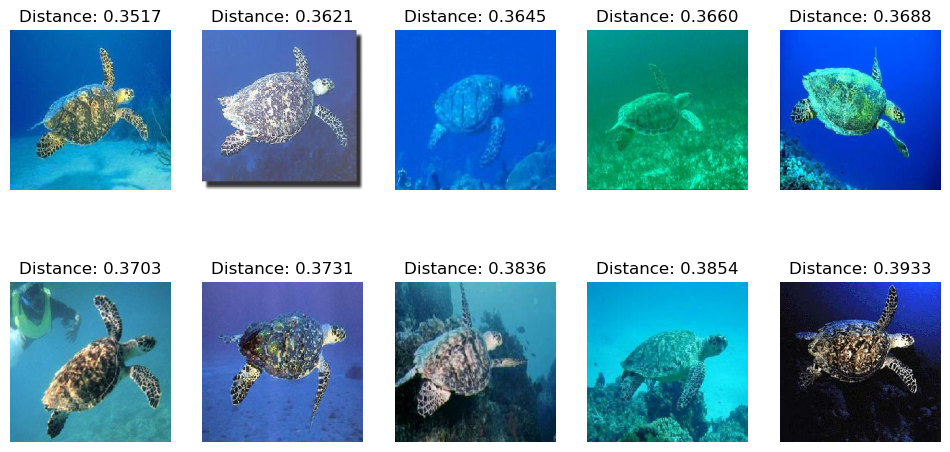

In [10]:
# Function to find the nearest images based on extracted features
def find_nearest_images(image_path, base_model, n_neighbors=10):
    # Extract features for the input image
    image_features = extract_features_fixed(image_path, base_model)
    
    # Using NearestNeighbors to find the nearest images
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    neighbors.fit(features_list)
    
    distances, indices = neighbors.kneighbors([image_features])
    
    # Print the nearest images and their distance
    print(f"Nearest images to {image_path}:")
    for i in range(n_neighbors):
        print(f"{image_paths[indices[0][i]]} - Distance: {distances[0][i]:.4f}")
    
    # Optionally, plot the nearest images
    plt.figure(figsize=(12, 6))
    for i in range(n_neighbors):
        img = load_img(image_paths[indices[0][i]], target_size=(224, 224))
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Distance: {distances[0][i]:.4f}")
    plt.show()

# Example usage: Finding nearest images
find_nearest_images('photos/tt.jpg', base_model, n_neighbors=10)